In [1]:
import sklearn
sklearn.__version__

'1.0.2'

## 1. LinearRegression
- 공부시간에 따른 시험 접수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('../dataset/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [6]:
# slicing(iloc 사용)
#처음부터 마지막 컬럼 직전까지의 데이터(독립변수 - 원인)
X = dataset.iloc[:,:-1].values
#마지막 칼럼 데이터(종속변수 - 결과값)
y = dataset.iloc[:,-1].values

In [7]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #선형회귀 객체 생성
# fit은 훈련은 시킨다는 명령어다!
reg.fit(X,y)

LinearRegression()

In [59]:
#예측값 설정
y_pred = reg.predict(X) # x에 대한 예측값
y_pred
print(y_pred.shape)

(20,)


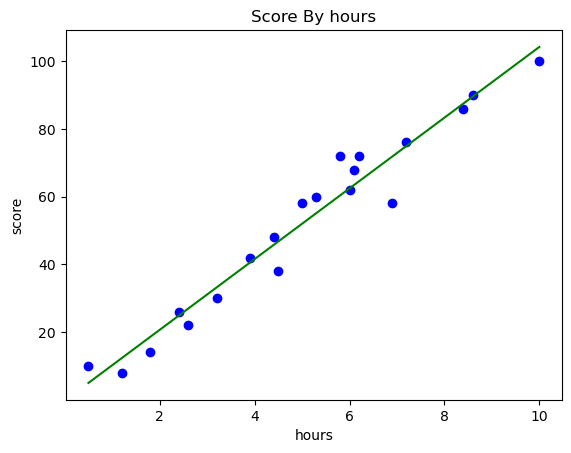

In [10]:
# 시각화를 해보자!
plt.scatter(X,y, color='blue') #산점도 그래프
plt.plot(X,y_pred,color='green') #선그래프
plt.title('Score By hours') #제목
plt.xlabel('hours') #x축이름
plt.ylabel('score') #y축 이름
plt.show()

In [12]:
# 아홉시간 공부했을떄 예상점수
print("9hours study predict:",reg.predict([[9]]))

9hours study predict: [93.77478776]


In [13]:
#기울기 값찾기(coef)
reg.coef_

array([10.44369694])

In [14]:
#y절편 찾기
reg.intercept_

-0.218484702867201

In [15]:
#예측방정식 : y = 10.4436x - 0.2184


### 예측값이 과연 올바른가?
- 데이터를 분리하여 알아보자!
- 훈련세트와 테스트 set로 분리 : 훈련세트로 모델만들고, testset으로 예측

In [16]:
# 데이터를 분리하자!
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('../dataset/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [41]:
# 독립변수와 종속변수를 분리하자!
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [42]:
# data분리
from sklearn.model_selection import train_test_split
#튜플형태로 값이 4개로 반환해준다.

#훈련세트를 80으로 테스트 세트를 20으로 분류
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [43]:
X, len(X) #전체데이터 x, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

### 분리된 데이터를 통한 모델링

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [45]:
reg.fit(X_train, y_train) # 훈련세트로 학습시키기

LinearRegression()

### 데이터시각화(훈련세트로만!)

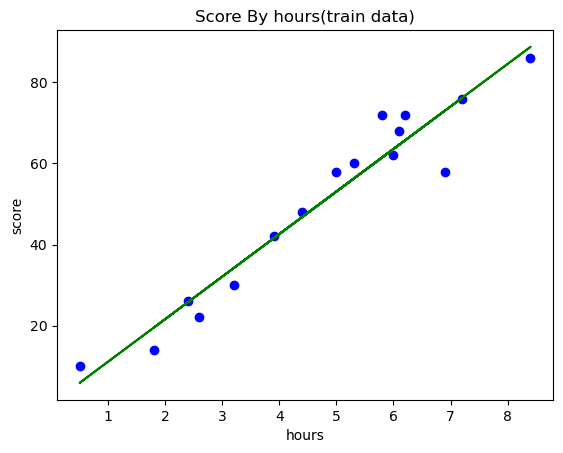

In [46]:
plt.scatter(X_train,y_train, color='blue') #산점도 그래프
plt.plot(X_train,reg.predict(X_train),color='green') #선그래프
plt.title('Score By hours(train data)') #제목
plt.xlabel('hours') #x축이름
plt.ylabel('score') #y축 이름
plt.show()

### data시각화(테스트셋트로만!)

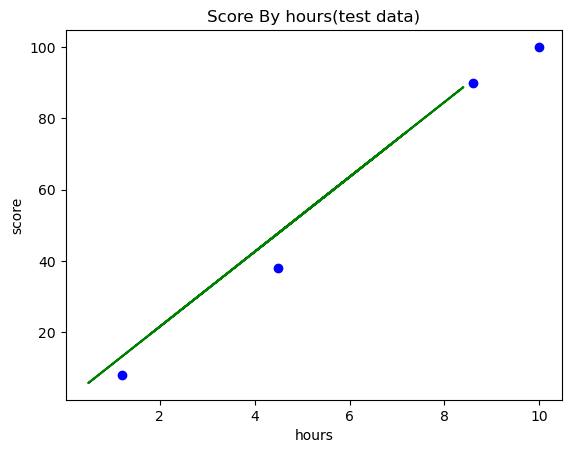

In [29]:
plt.scatter(X_test,y_test, color='blue') #산점도 그래프
plt.plot(X_train,reg.predict(X_train),color='green') #선그래프
plt.title('Score By hours(test data)') #제목
plt.xlabel('hours') #x축이름
plt.ylabel('score') #y축 이름
plt.show()

In [30]:
reg.coef_

array([10.49161294])

In [31]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [34]:
reg.score(X_test, y_test)

0.9727616474310156